- rest
- practice
- boredom
- flow
- ultra
- overload

In [ ]:
import heartpy as hp
import pandas as pd

In [29]:
name = "kumakura"
phase = "practice"
folder_name = f"0_{name}"

In [30]:


# option command v でフルパスをコピー
# hrdata = hp.get_data('/Users/miyakooti/repositories/arai_MATLAB_program/data/20221220_kumakura/SSSEP_20221220T152825_kumakura_rest_good.mat')
hrdata = hp.get_data(f"csv/{folder_name}/ECG_{name}_{phase}.csv", delim = ",", column_name = "ECG") # numpy.ndarray
fs = 500.0

In [31]:
sec = len(hrdata)/500
print(f"計測時間は{sec}秒です")

計測時間は223.348秒です


### ここで取得されたのは numpy.ndarray型

In [32]:
working_data, measures = hp.process(hrdata, fs, report_time=True, calc_freq=True)


Finished in 0.103930 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat


### データ数多すぎるので、論文とかで画像載っけるときは生データをスライスしてもイイかも

[参考文献](https://note.nkmk.me/python-numpy-ndarray-slice/)

### plot

/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


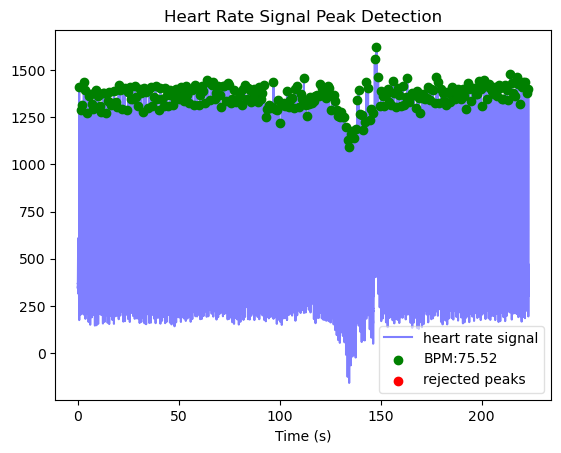

In [33]:
hp.plotter(working_data, measures)

In [34]:
print("LF：", measures["lf"])
print("HF：", measures["hf"])
print("LF/HF：", measures["lf/hf"])

LF： 351.8465856459569
HF： 207.4832803429106
LF/HF： 1.6957828364023115


In [35]:
measures

{'bpm': 75.52394738498332,
 'ibi': 794.45,
 'sdnn': 31.370783723531222,
 'sdsd': 17.63199855314906,
 'rmssd': 31.337679863248802,
 'pnn20': 0.5340501792114696,
 'pnn50': 0.08243727598566308,
 'hr_mad': 22.0,
 'sd1': 22.158334570957543,
 'sd2': 38.39538746315509,
 's': 2672.797416348244,
 'sd1/sd2': 0.5771092840831749,
 'breathingrate': 0.36666666666666664,
 'vlf': 649.6751575055167,
 'lf': 351.8465856459569,
 'hf': 207.4832803429106,
 'lf/hf': 1.6957828364023115,
 'p_total': 1209.0050234943842,
 'vlf_perc': 53.73634888858958,
 'lf_perc': 29.102160769275848,
 'hf_perc': 17.161490342134577,
 'lf_nu': 62.905023858132374,
 'hf_nu': 37.09497614186763}

In [36]:
type(measures)

dict

In [50]:
# TSV形式でindexを出力しない場合
# df.to_csv('output.tsv', sep='\t', index=False)
 
# TSV形式でindexを出力し、なおかつindexの列名をcol0と設定する場合
df = pd.DataFrame(measures,index=[f"{phase}", "boredom"])

In [51]:
# df.to_csv(f'{name}_rest.csv', sep=',', index=True, index_label='practice')

In [54]:
# 2回目以降
df.to_csv(f'{name}_HRV.csv', sep=',', mode="a", header=False)

In [ ]:
# 1回目
df.to_csv(f'{name}_HRV.csv', sep=',', mode="a", header=False)